# 제목

2024.01.29

---

## 1. 프로젝트 개요

### 1-1. 프로젝트 요약
- 제목: 제목
- 설명: 설명
- 사용한 데이터셋
    - [제목](링크): 설명
- 진행 절차 및 내용
    - 내용1
    - 내용2
- 사용한 스킬셋
    - pandas
    - matplotlib, seaborn
    - ...

### 1-2. 프로젝트 진행 배경

내용

---

## 2. 데이터 로딩 및 EDA

### 2-1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [4]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 2-2. 데이터 분포 확인 및 전처리

#### 2-2-1. 컬럼별 EDA (numeric)

In [5]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7590-VHVEG,1,29.85,29.85
5575-GNVDE,34,56.95,1889.5
3668-QPYBK,2,53.85,108.15
7795-CFOCW,45,42.30,1840.75
9237-HQITU,2,70.70,151.65
...,...,...,...
6840-RESVB,24,84.80,1990.5
2234-XADUH,72,103.20,7362.9
4801-JZAZL,11,29.60,346.45


dtype = object인 ```TotalCharges``` 컬럼에 대해 float 변환을 수행한다. 이때 결측치 때문에 에러가 나서 빈 문자열을 0으로 변경하는 과정도 같이 수행한다.

In [6]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0).astype(float)
df[['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7590-VHVEG,1,29.85,29.85
5575-GNVDE,34,56.95,1889.50
3668-QPYBK,2,53.85,108.15
7795-CFOCW,45,42.30,1840.75
9237-HQITU,2,70.70,151.65
...,...,...,...
6840-RESVB,24,84.80,1990.50
2234-XADUH,72,103.20,7362.90
4801-JZAZL,11,29.60,346.45


numeric한 컬럼들이기 때문에 우선 boxplot을 그려서 분포를 확인해 본다.

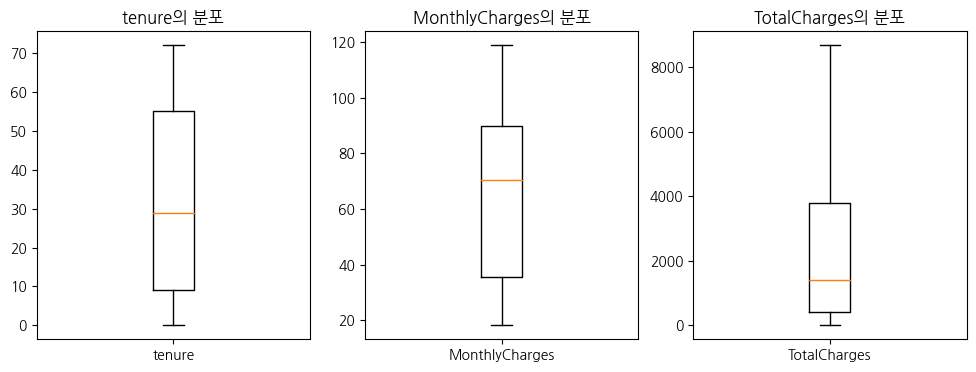

In [7]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))

col_names = ['tenure', 'MonthlyCharges', 'TotalCharges']

for i in range(len(col_names)):
    axes[i].boxplot(
        df[col_names[i]],
        labels=[col_names[i]]
    )
    axes[i].set_title(f"{col_names[i]}의 분포")
    
plt.show()

딱히 이상치가 존재하지는 않고 예쁜 분포인데, ```TotalCharges```의 경우 왼쪽으로 약간 치우진 분포임을 확인하였다.

이어서, 목적변수와 각 컬럼들 사이의 관계성을 파악해 본다.

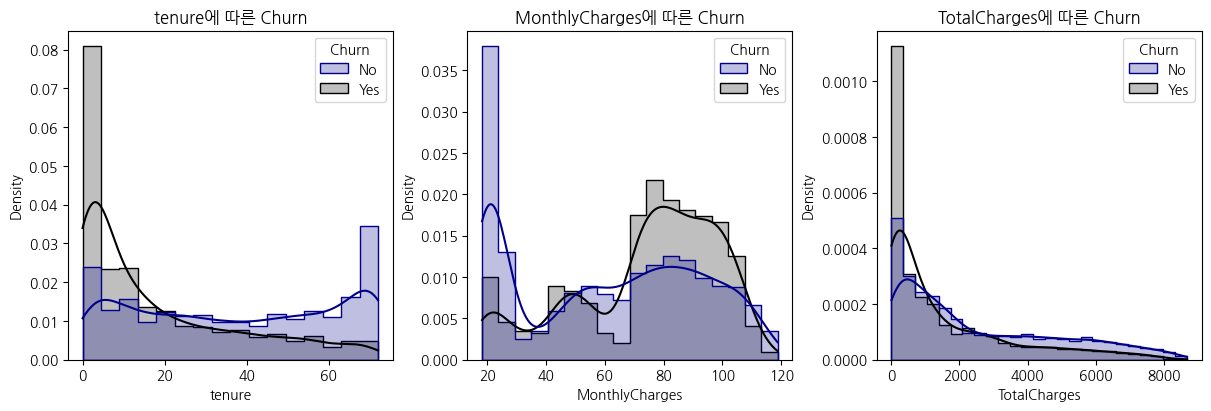

In [8]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), constrained_layout=True)

for i in range(len(col_names)):
    sns.histplot(
        data=df,
        x=col_names[i],
        hue='Churn',
        element='step',
        stat='density',
        common_norm=False,
        kde=True,
        palette=['darkblue', 'black'],
        ax=axes[i]
    )
    axes[i].set_title(f"{col_names[i]}에 따른 Churn")

plt.show()

이상의 그래프를 확인해 보면
- ```tenure``` 값이 낮을 때 ```Churn```이 눈에 띄게 높은 경향이 있다.
- ```MonthlyCharges```값이 70 ~ 100 근방일 때 ```Churn```이 가장 높은 분포를 보인다.
- ```TotalCharges```값이 낮을 때 ```Churn```이 확 튀는 모습이 나타난다.

이상의 결과를 살펴보면서, ```MonthlyCharges```를 categorical로 변환하면 어떨지 궁금해졌다.

In [9]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

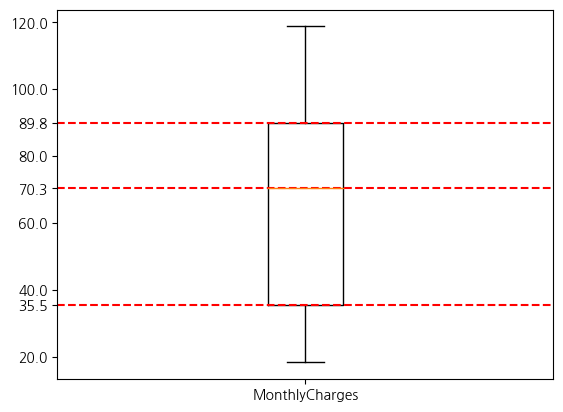

In [10]:
plt.boxplot(
    df['MonthlyCharges'],
    labels=['MonthlyCharges']
)

plt.axhline(np.quantile(df['MonthlyCharges'], 0.25), linestyle='--', color='red')
plt.axhline(np.quantile(df['MonthlyCharges'], 0.5), linestyle='--', color='red')
plt.axhline(np.quantile(df['MonthlyCharges'], 0.75), linestyle='--', color='red')

plt.yticks(
    [i for i in range(20, 121, 20)] + [np.quantile(df['MonthlyCharges'], 0.25)] + \
    [np.quantile(df['MonthlyCharges'], 0.5)] + [np.quantile(df['MonthlyCharges'], 0.75)]
)

plt.show()

**사분위수**(소수점 첫째 자리에서 반올림)를 이용하면 표본의 개수를 비교적 균등하게 4등분할 수 있다.
- 1사분위수(전체 데이터 중 25%에 해당하는 수): 36
- 중위수(전체 데이터 중 50%에 해당하는 수): 70
- 3사분위수(전체 데이터 중 75%에 해당하는 수): 90

In [11]:
df['MonthlyCharges_categorical'] = df['MonthlyCharges'].apply(
    lambda x:'0-36' if x < 36
        else '36-70' if x < 70
        else '70-90' if x < 90
        else '90+'
)

df[['MonthlyCharges', 'MonthlyCharges_categorical']]

,MonthlyCharges,MonthlyCharges_categorical
customerID,,
7590-VHVEG,29.85,0-36
5575-GNVDE,56.95,36-70
3668-QPYBK,53.85,36-70
7795-CFOCW,42.30,36-70
9237-HQITU,70.70,70-90
...,...,...
6840-RESVB,84.80,70-90
2234-XADUH,103.20,90+
4801-JZAZL,29.60,0-36


범주별로 개수가 균등하게 나뉘어졌는지 확인해보자.

In [12]:
np.round(df['MonthlyCharges_categorical'].value_counts(normalize=True, sort=False).to_frame(), 2)

,MonthlyCharges_categorical
0-36,0.25
36-70,0.24
70-90,0.26
90+,0.25


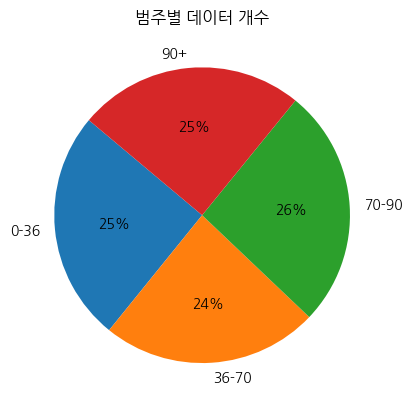

In [13]:
plt.pie(
    df['MonthlyCharges_categorical'].value_counts(normalize=True, sort=False),
    labels=df['MonthlyCharges_categorical'].value_counts(normalize=True, sort=False).index,
    autopct='%.0f%%',
    startangle=140
)

plt.title('범주별 데이터 개수')
plt.show()

각 범주의 개수를 확인해 본 결과, 반올림 이슈 때문에 약간의 차이가 있긴 하나 거의 균등하게 나뉘어진 점을 확인할 수 있다.

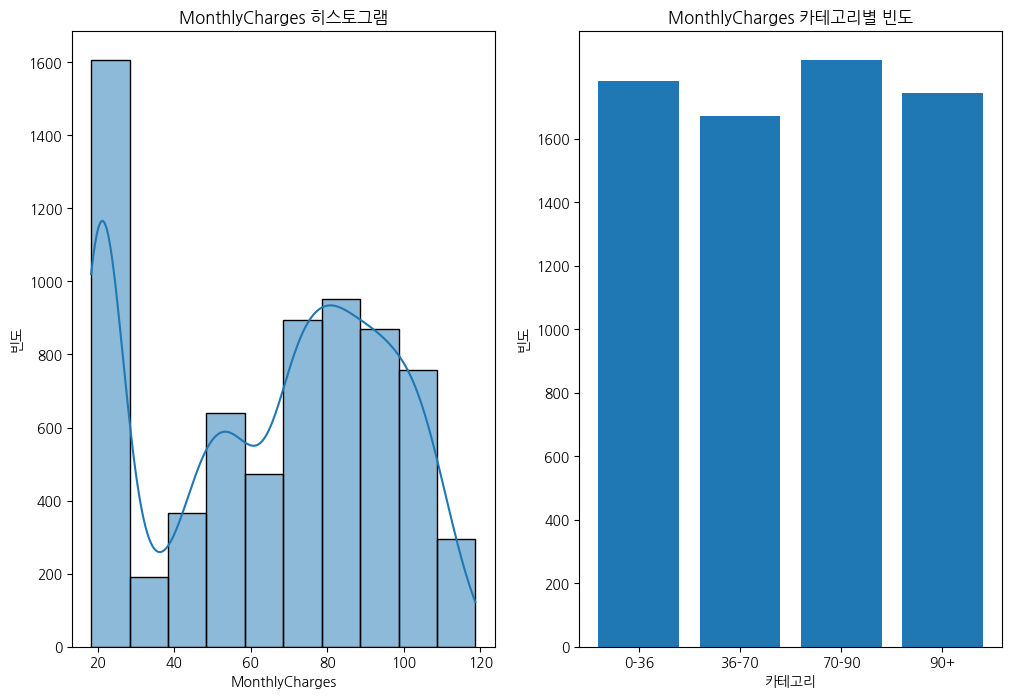

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(12,8))

sns.histplot(df['MonthlyCharges'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('MonthlyCharges 히스토그램')
axes[0].set_yticks([i for i in range(0, 1601, 200)])
axes[0].set_xlabel('MonthlyCharges')
axes[0].set_ylabel('빈도')

axes[1].bar(
    df.groupby('MonthlyCharges_categorical').size().index,
    df.groupby('MonthlyCharges_categorical').size()
)
axes[1].set_yticks([i for i in range(0, 1601, 200)])
axes[1].set_title('MonthlyCharges 카테고리별 빈도')
axes[1].set_xlabel('카테고리')
axes[1].set_ylabel('빈도')
plt.show()

#### 2-2-2. 컬럼별 분포 확인 (categorical)

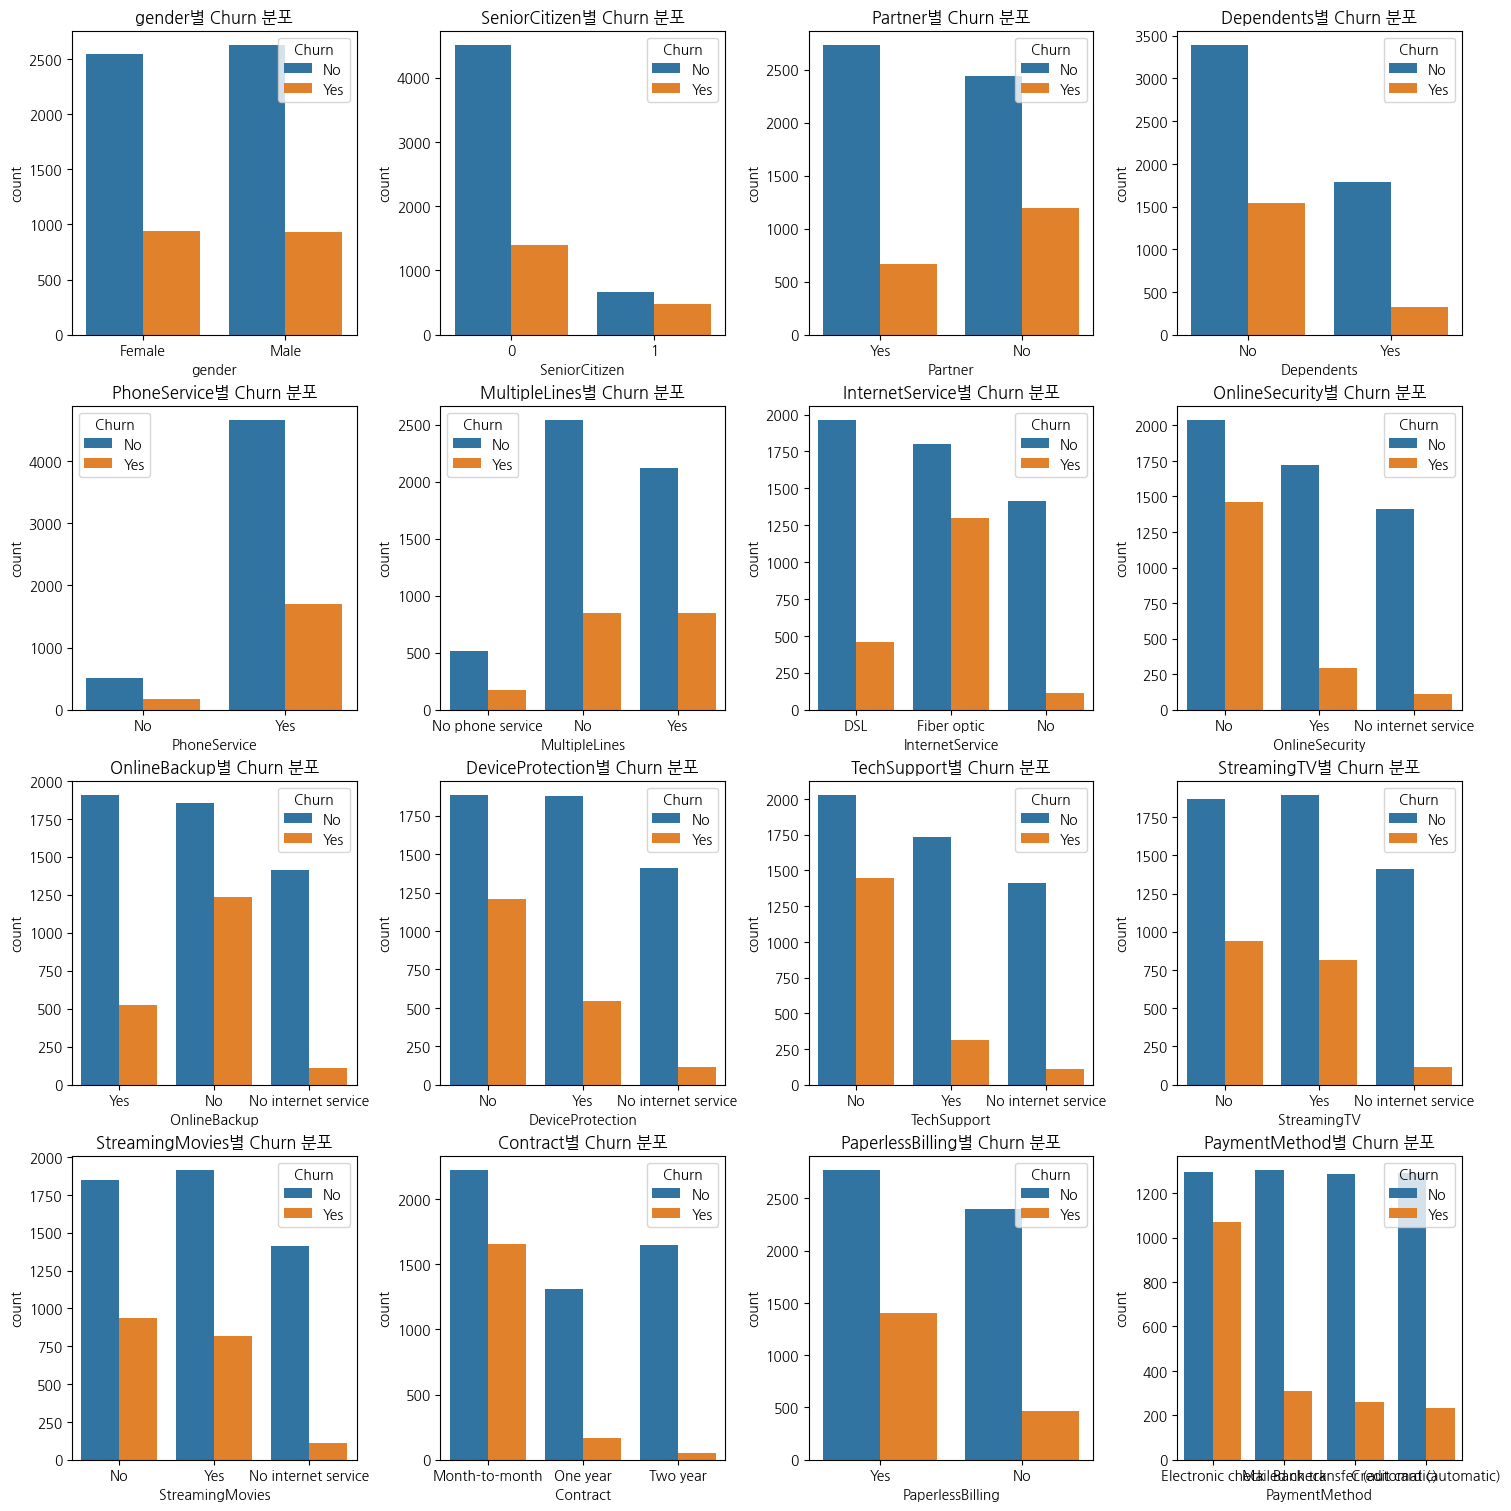

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15), constrained_layout=True)

col_names = [
    ['gender', 'SeniorCitizen', 'Partner', 'Dependents'],
    ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity'],
    ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV'],
    ['StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
]

for i in range(4):
    for j in range(4):
        sns.countplot(data=df, x=col_names[i][j], hue='Churn', ax=axes[i][j])
        axes[i][j].set_title(f"{col_names[i][j]}별 Churn 분포")

plt.show()

In [16]:
df['MonthlyCharges_0_36'] = df['MonthlyCharges'].apply(lambda x:1 if x < 36 else 0)
df['MonthlyCharges_36_70'] = df['MonthlyCharges'].apply(lambda x:1 if 36 <= x < 70 else 0)
df['MonthlyCharges_70_90'] = df['MonthlyCharges'].apply(lambda x:1 if 70 <= x < 90 else 0)
df['MonthlyCharges_90'] = df['MonthlyCharges'].apply(lambda x:1 if x >= 90 else 0)

df[['MonthlyCharges_categorical', 'MonthlyCharges_0_36', 'MonthlyCharges_36_70', 'MonthlyCharges_70_90', 'MonthlyCharges_90']]

,MonthlyCharges_categorical,MonthlyCharges_0_36,MonthlyCharges_36_70,MonthlyCharges_70_90,MonthlyCharges_90
customerID,,,,,
7590-VHVEG,0-36,1,0,0,0
5575-GNVDE,36-70,0,1,0,0
3668-QPYBK,36-70,0,1,0,0
7795-CFOCW,36-70,0,1,0,0
9237-HQITU,70-90,0,0,1,0
...,...,...,...,...,...
6840-RESVB,70-90,0,0,1,0
2234-XADUH,90+,0,0,0,1
4801-JZAZL,0-36,1,0,0,0


In [17]:
df.nunique()[(df.nunique() == 2) & (df.dtypes == 'object')]

gender              2
Partner             2
Dependents          2
PhoneService        2
PaperlessBilling    2
Churn               2
dtype: int64

범주형 데이터들을 전처리하기 위해 우선 각 컬럼별 고유값 개수를 살펴본다. 이미 numeric으로 변환된 것들을 제외하고, 2개짜리 object들부터 처리해 본다.

In [18]:
for column in df.nunique()[(df.nunique() == 2) & (df.dtypes == 'object')].index:
    print(f'{column} = {df[column].unique()}')

gender = ['Female' 'Male']
Partner = ['Yes' 'No']
Dependents = ['No' 'Yes']
PhoneService = ['No' 'Yes']
PaperlessBilling = ['Yes' 'No']
Churn = ['No' 'Yes']


```gender```를 제외하면 ```Yes```, ```No```로 구성되어 있기 때문에 처리하기 쉽다.

In [19]:
df['gender_binary'] = df['gender'].map({'Male': 0, 'Female': 1})
df['Partner_binary'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents_binary'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService_binary'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling_binary'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['Churn_binary'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [20]:
df.nunique()[(df.nunique() == 2) & (df.dtypes != 'object')]

SeniorCitizen              2
MonthlyCharges_0_36        2
MonthlyCharges_36_70       2
MonthlyCharges_70_90       2
MonthlyCharges_90          2
gender_binary              2
Partner_binary             2
Dependents_binary          2
PhoneService_binary        2
PaperlessBilling_binary    2
Churn_binary               2
dtype: int64

2개짜리로 구성되어 있는 컬럼들은 0, 1의 binary로 바꾸어 주었다.

In [21]:
drop_columns = df.nunique()[(df.nunique() == 2) & (df.dtypes == 'object')].index.tolist()
drop_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

binary로 바꿔준 컬럼들의 원본 버전은 추후 삭제하기 위해 별도의 리스트에 저장해 두었다.

In [22]:
df.nunique()[(df.nunique() >= 3) & (df.dtypes == 'object')]

MultipleLines                 3
InternetService               3
OnlineSecurity                3
OnlineBackup                  3
DeviceProtection              3
TechSupport                   3
StreamingTV                   3
StreamingMovies               3
Contract                      3
PaymentMethod                 4
MonthlyCharges_categorical    4
dtype: int64

In [23]:
for column in df.nunique()[(df.nunique() >= 3) & (df.dtypes == 'object')].index:
    print(f'{column} = {df[column].unique()}')

MultipleLines = ['No phone service' 'No' 'Yes']
InternetService = ['DSL' 'Fiber optic' 'No']
OnlineSecurity = ['No' 'Yes' 'No internet service']
OnlineBackup = ['Yes' 'No' 'No internet service']
DeviceProtection = ['No' 'Yes' 'No internet service']
TechSupport = ['No' 'Yes' 'No internet service']
StreamingTV = ['No' 'Yes' 'No internet service']
StreamingMovies = ['No' 'Yes' 'No internet service']
Contract = ['Month-to-month' 'One year' 'Two year']
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges_categorical = ['0-36' '36-70' '70-90' '90+']


```MultipleLines```, ```OnlineSecurity```, ```OnlineBackup```, ```DeviceProtection```, ```TechSupport```, ```StreamingTV```, ```StreamingMovies```는 다른 컬럼(```PhoneService```, ```InternetService```)에 종속되기 때문에 **MECE 원칙에 위배**된다. 컬럼이 중복되는 의미를 가질 수 있으므로, No phone service 및 No internet service는 No와 동일하게 간주하여 Label Encoding을 진행한다.

```InternetService```는 ```No```와 ```Yes```의 이진 형태로 간주한다.

```Contract``` 컬럼은 월 수로 생각하여, Month-to-month는 1, One year는 12, Two year는 24를 주도록 한다.

```PaymentMethod```는 컬럼의 값들 사이에 수치적인 상하 관계가 없기 때문에 One-Hot Encoding을 진행한다.

In [24]:
df['MultipleLines_binary'] = df['MultipleLines'].map({'No': 0, 'No phone service': 0, 'Yes': 1})
df['InternetService_binary'] = df['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 1})
df['OnlineSecurity_binary'] = df['OnlineSecurity'].map({'No': 0, 'No internet service': 0, 'Yes': 1})
df['OnlineBackup_binary'] = df['OnlineBackup'].map({'No': 0, 'No internet service': 0, 'Yes': 1})
df['DeviceProtection_binary'] = df['DeviceProtection'].map({'No': 0, 'No internet service': 0, 'Yes': 1})
df['TechSupport_binary'] = df['TechSupport'].map({'No': 0, 'No internet service': 0, 'Yes': 1})
df['StreamingTV_binary'] = df['StreamingTV'].map({'No': 0, 'No internet service': 0, 'Yes': 1})
df['StreamingMovies_binary'] = df['StreamingMovies'].map({'No': 0, 'No internet service': 0, 'Yes': 1})
df['Contract_binary'] = df['Contract'].map({'Month-to-month': 1, 'One year': 12, 'Two year': 24})

In [25]:
uniques = df['PaymentMethod'].unique().tolist()
df['PaymentMethod_1'] = df['PaymentMethod'].apply(lambda x: 1 if x == uniques[0] else 0)
df['PaymentMethod_2'] = df['PaymentMethod'].apply(lambda x: 1 if x == uniques[1] else 0)
df['PaymentMethod_3'] = df['PaymentMethod'].apply(lambda x: 1 if x == uniques[2] else 0)
df['PaymentMethod_4'] = df['PaymentMethod'].apply(lambda x: 1 if x == uniques[3] else 0)

df[['PaymentMethod', 'PaymentMethod_1', 'PaymentMethod_2', 'PaymentMethod_3', 'PaymentMethod_4']]

,PaymentMethod,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4
customerID,,,,,
7590-VHVEG,Electronic check,1,0,0,0
5575-GNVDE,Mailed check,0,1,0,0
3668-QPYBK,Mailed check,0,1,0,0
7795-CFOCW,Bank transfer (automatic),0,0,1,0
9237-HQITU,Electronic check,1,0,0,0
...,...,...,...,...,...
6840-RESVB,Mailed check,0,1,0,0
2234-XADUH,Credit card (automatic),0,0,0,1
4801-JZAZL,Electronic check,1,0,0,0


In [26]:
df.nunique()[(df.nunique() == 2) & (df.dtypes != 'object')]

SeniorCitizen              2
MonthlyCharges_0_36        2
MonthlyCharges_36_70       2
MonthlyCharges_70_90       2
MonthlyCharges_90          2
gender_binary              2
Partner_binary             2
Dependents_binary          2
PhoneService_binary        2
PaperlessBilling_binary    2
Churn_binary               2
MultipleLines_binary       2
InternetService_binary     2
OnlineSecurity_binary      2
OnlineBackup_binary        2
DeviceProtection_binary    2
TechSupport_binary         2
StreamingTV_binary         2
StreamingMovies_binary     2
PaymentMethod_1            2
PaymentMethod_2            2
PaymentMethod_3            2
PaymentMethod_4            2
dtype: int64

In [27]:
drop_columns += df.nunique()[(df.nunique() > 2) & (df.dtypes == 'object')].index.tolist()
drop_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'MonthlyCharges_categorical']

In [28]:
drop_columns.append('MonthlyCharges')
drop_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'MonthlyCharges_categorical',
 'MonthlyCharges']

앞서 원핫인코딩을 진행했던 ```MonthlyCharges``` 원본도 제거해 주는 게 타당하겠다.

In [29]:
df.drop(drop_columns, axis=1)

,SeniorCitizen,tenure,TotalCharges,MonthlyCharges_0_36,MonthlyCharges_36_70,MonthlyCharges_70_90,MonthlyCharges_90,gender_binary,Partner_binary,Dependents_binary,...,OnlineBackup_binary,DeviceProtection_binary,TechSupport_binary,StreamingTV_binary,StreamingMovies_binary,Contract_binary,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,1,0,0,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
5575-GNVDE,0,34,1889.50,0,1,0,0,0,0,0,...,0,1,0,0,0,12,0,1,0,0
3668-QPYBK,0,2,108.15,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
7795-CFOCW,0,45,1840.75,0,1,0,0,0,0,0,...,0,1,1,0,0,12,0,0,1,0
9237-HQITU,0,2,151.65,0,0,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,24,1990.50,0,0,1,0,0,1,1,...,0,1,1,1,1,12,0,1,0,0
2234-XADUH,0,72,7362.90,0,0,0,1,1,1,1,...,1,1,0,1,1,12,0,0,0,1
4801-JZAZL,0,11,346.45,1,0,0,0,1,1,1,...,0,0,0,0,0,1,1,0,0,0


그러면 최종적으로 이런 결과가 나오게 되겠다.

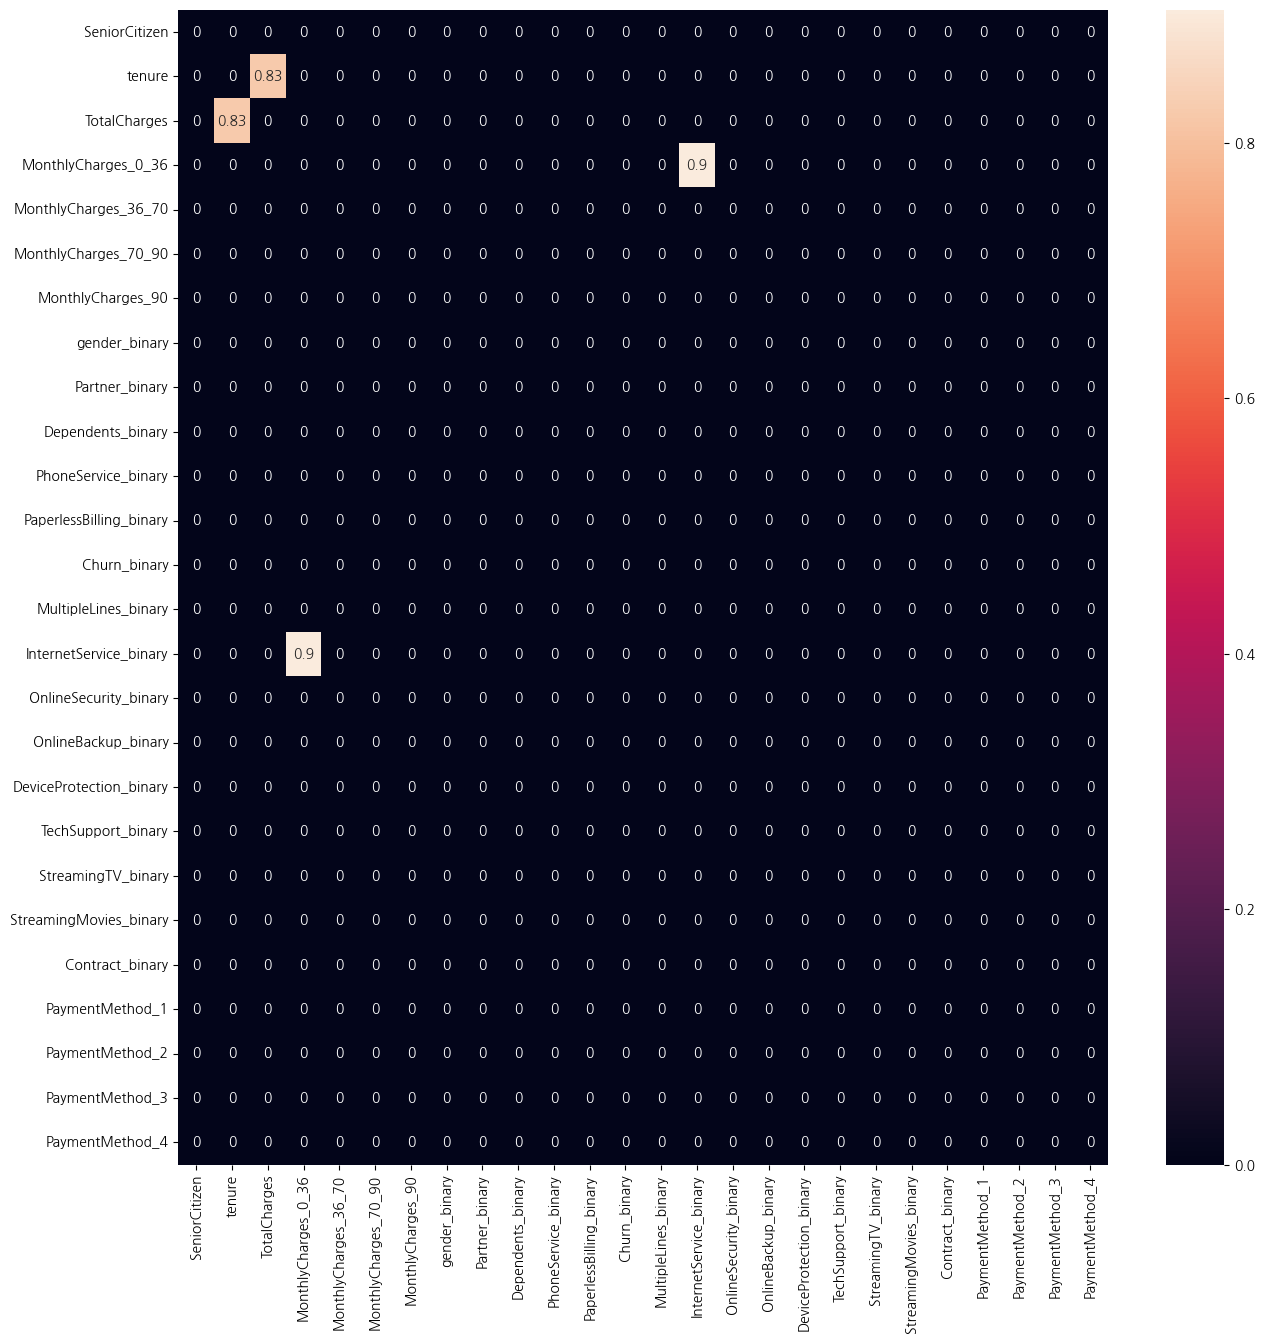

In [31]:
abs_heatmap = np.abs(df.drop(drop_columns, axis=1).corr())

plt.figure(figsize=(15, 15))
sns.heatmap(
    abs_heatmap[(abs_heatmap > 0.7) & (abs_heatmap < 1)].fillna(0),
    annot=True
)
plt.show()

heatmap을 그려봤을 때 상관계수가 0.7 이상으로 매우 높게 나오는 컬럼은 ```tenure```과 ```TotalCharges```이다. 지난주에 다중공선성 문제를 고려하기 위해 ```TotalCharges``` 컬럼을 제거하기로 결정했던 만큼 이 역시 제거하여 진행하도록 한다.

In [32]:
drop_columns.append('TotalCharges')
drop_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'MonthlyCharges_categorical',
 'MonthlyCharges',
 'TotalCharges']

In [33]:
new_df = df.drop(drop_columns, axis=1)
new_df

,SeniorCitizen,tenure,MonthlyCharges_0_36,MonthlyCharges_36_70,MonthlyCharges_70_90,MonthlyCharges_90,gender_binary,Partner_binary,Dependents_binary,PhoneService_binary,...,OnlineBackup_binary,DeviceProtection_binary,TechSupport_binary,StreamingTV_binary,StreamingMovies_binary,Contract_binary,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,1,0,0,0,1,1,0,0,...,1,0,0,0,0,1,1,0,0,0
5575-GNVDE,0,34,0,1,0,0,0,0,0,1,...,0,1,0,0,0,12,0,1,0,0
3668-QPYBK,0,2,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
7795-CFOCW,0,45,0,1,0,0,0,0,0,0,...,0,1,1,0,0,12,0,0,1,0
9237-HQITU,0,2,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,24,0,0,1,0,0,1,1,1,...,0,1,1,1,1,12,0,1,0,0
2234-XADUH,0,72,0,0,0,1,1,1,1,1,...,1,1,0,1,1,12,0,0,0,1
4801-JZAZL,0,11,1,0,0,0,1,1,1,0,...,0,0,0,0,0,1,1,0,0,0


In [35]:
with open('new_df.pkl', 'wb') as file:
    pickle.dump(new_df, file)

---

## 3. 데이터 분석

### 3-1. 문제 정의

이탈 유저 예측 모델을 개발한다.

### 3-2. 데이터 분석

### 3-3. 결과 해석

---

## 4. 후기

내용

### 3-1. 전처리